In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.metrics import edit_distance
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [72]:
df = pd.read_excel('Technical Test_Data Analyst.xlsx', sheet_name='Data')

- **Berikan suggestion atau saran bagaimana PT XYZ dapat meningkatkan growth, profit secara nasional dalam setiap provinsi berdasarkan data terlampir.**

## Tips for Analysis
Data analysis can be a powerful tool for increasing growth and profit, even with a relatively simple dataset containing name, city, and profit per product. Here are some suggestions for how to use data analysis to achieve these goals:

1. Identify top customers and target them with personalized marketing campaigns.
- Analyze profit per product to identify your most profitable customers.
- Use city data to segment your customers into geographic regions.
- Develop targeted marketing campaigns that appeal to the specific needs and interests of your top customers in each region.

2. Analyze product profitability to identify opportunities for growth.
- Calculate the profit margin for each product.
- Identify products with high profit margins and low sales volume.
- Develop strategies to increase sales of these high-profit products, such as offering discounts or promotions.

3. Use data to optimize pricing strategies.
- Analyze the relationship between price and sales volume for each product.
- Identify products that are underpriced or overpriced.
- Adjust prices to maximize profit.

4. Use data to improve customer satisfaction.
- Analyze customer feedback to identify common complaints and areas for improvement.
- Use this data to develop strategies for improving customer satisfaction.
- Track customer satisfaction metrics over time to measure the effectiveness of your efforts.

5. Use data to identify new business opportunities.
- Analyze sales data to identify trends and patterns.
- Use these insights to develop new products or services that are likely to be successful.
- Expand into new markets that are underserved or have high potential for growth.

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   agen        672 non-null    object
 1   provinsi    672 non-null    object
 2   kota        672 non-null    object
 3   subtotal    672 non-null    int64 
 4   SERUM       672 non-null    int64 
 5   CREAM       672 non-null    int64 
 6   TONER       672 non-null    int64 
 7   FACIALWASH  672 non-null    int64 
 8   SHEETMASK   672 non-null    int64 
 9   NIGHTCREAM  672 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 52.6+ KB


In [74]:
# Membuat nama kolom konsisten lowercase

df.columns = df.columns.str.lower()
df.head()

,agen,provinsi,kota,subtotal,serum,cream,toner,facialwash,sheetmask,nightcream
0,Abdul Karim,KABUPATEN KEPULAUAN SERIBU,DKI JAKARTA,1565532000,287712000,505440000,277992000,332316000,67032000,95040000
1,Abdul latif murabbi,KABUPATEN PACITAN,JAWA TIMUR,6118494000,984960000,1692900000,923400000,1250010000,424536000,842688000
2,Abdullah Faiq,KABUPATEN CILACAP,JAWA TENGAH,4573972800,384912000,1341360000,1341360000,1266840000,0,239500800
3,Abdur Rasyid,KABUPATEN KEPULAUAN SERIBU,DKI JAKARTA,242160000,0,87480000,58320000,55080000,12768000,28512000
4,abubakar,KABUPATEN KARIMUN,KEPULAUAN RIAU,595546000,90720000,158760000,113400000,117810000,37240000,77616000


In [75]:
# Mengubah tipe data harga ke dalam int

df[['subtotal','serum','cream','toner','facialwash','sheetmask','nightcream']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   agen        672 non-null    object
 1   provinsi    672 non-null    object
 2   kota        672 non-null    object
 3   subtotal    672 non-null    int64 
 4   serum       672 non-null    int64 
 5   cream       672 non-null    int64 
 6   toner       672 non-null    int64 
 7   facialwash  672 non-null    int64 
 8   sheetmask   672 non-null    int64 
 9   nightcream  672 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 52.6+ KB


In [76]:
cols = ['serum','cream','toner','facialwash','sheetmask','nightcream']

In [77]:
# Mengubah nama provinsi menjadi kota dan sebaliknya

df.rename(columns={'provinsi':'kota','kota':'provinsi'},inplace=True)
df.head()

,agen,kota,provinsi,subtotal,serum,cream,toner,facialwash,sheetmask,nightcream
0,Abdul Karim,KABUPATEN KEPULAUAN SERIBU,DKI JAKARTA,1565532000,287712000,505440000,277992000,332316000,67032000,95040000
1,Abdul latif murabbi,KABUPATEN PACITAN,JAWA TIMUR,6118494000,984960000,1692900000,923400000,1250010000,424536000,842688000
2,Abdullah Faiq,KABUPATEN CILACAP,JAWA TENGAH,4573972800,384912000,1341360000,1341360000,1266840000,0,239500800
3,Abdur Rasyid,KABUPATEN KEPULAUAN SERIBU,DKI JAKARTA,242160000,0,87480000,58320000,55080000,12768000,28512000
4,abubakar,KABUPATEN KARIMUN,KEPULAUAN RIAU,595546000,90720000,158760000,113400000,117810000,37240000,77616000


# EDA & Cleansing

In [78]:
# Check nilai unique

print('unique agen: ', df['agen'].nunique())
print('unique provinsi: ', df['provinsi'].nunique())
print('unique kota: ', df['kota'].nunique())

unique agen:  672
unique provinsi:  35
unique kota:  35


Karena jumlah data unique provinsi dan kota adalah sama, maka pada data ini satu provinsi hanya memiliki satu kota begitu juga sebaliknya

In [79]:
# lower kolom nama,provinsi & kota

df['agen'] = df['agen'].str.lower()
df['provinsi'] = df['provinsi'].str.lower()
df['kota'] = df['kota'].str.lower()
df

,agen,kota,provinsi,subtotal,serum,cream,toner,facialwash,sheetmask,nightcream
0,abdul karim,kabupaten kepulauan seribu,dki jakarta,1565532000,287712000,505440000,277992000,332316000,67032000,95040000
1,abdul latif murabbi,kabupaten pacitan,jawa timur,6118494000,984960000,1692900000,923400000,1250010000,424536000,842688000
2,abdullah faiq,kabupaten cilacap,jawa tengah,4573972800,384912000,1341360000,1341360000,1266840000,0,239500800
3,abdur rasyid,kabupaten kepulauan seribu,dki jakarta,242160000,0,87480000,58320000,55080000,12768000,28512000
4,abubakar,kabupaten karimun,kepulauan riau,595546000,90720000,158760000,113400000,117810000,37240000,77616000
...,...,...,...,...,...,...,...,...,...,...
667,yunita dwi aris ambarsari,kabupaten cilacap,jawa tengah,5166936000,874800000,1341360000,933120000,1046520000,229824000,741312000
668,yunita indriyani,kabupaten bogor,jawa barat,1921941000,393660000,485514000,218700000,367659000,28728000,427680000
669,yustika ana badriyah,kabupaten bogor,jawa barat,4492486800,594864000,1281582000,734832000,826200000,387828000,667180800
670,zueldi,kabupaten pandeglang,banten,245760000,33696000,88128000,62208000,48960000,12768000,0


In [80]:
# Check nilai unique setelah lower

print('unique agen: ', df['agen'].nunique())
print('unique provinsi: ', df['provinsi'].nunique())
print('unique kota: ', df['kota'].nunique())

unique agen:  672
unique provinsi:  35
unique kota:  35


### Hapus simbol pada kolom nama

In [81]:
# Check apakah ada nama provinsi yang duplicated

np.sort(df['provinsi'].unique())

array(['aceh', 'bali', 'banten', 'bengkulu', 'di yogyakarta',
       'dki jakarta', 'gorontalo', 'jambi', 'jawa barat', 'jawa tengah',
       'jawa timur', 'kalimantan barat', 'kalimantan selatan',
       'kalimantan tengah', 'kalimantan timur', 'kalimantan utara',
       'kepulauan bangka belitung', 'kepulauan riau', 'lampung',
       'malaysia', 'maluku', 'maluku utara', 'nusa tenggara barat',
       'nusa tenggara timur', 'papua', 'papua barat', 'riau',
       'sulawesi barat', 'sulawesi selatan', 'sulawesi tengah',
       'sulawesi tenggara', 'sulawesi utara', 'sumatera barat',
       'sumatera selatan', 'sumatera utara'], dtype=object)

In [82]:
# Check apakah ada nama kota yang duplicated

np.sort(df['kota'].unique())

array(['johor', 'kabupaten banggai kepulauan', 'kabupaten bangka',
       'kabupaten bengkulu selatan', 'kabupaten boalemo',
       'kabupaten bogor', 'kabupaten bolaang mongondow',
       'kabupaten buton', 'kabupaten cilacap', 'kabupaten fakfak',
       'kabupaten halmahera barat', 'kabupaten jembrana',
       'kabupaten karimun', 'kabupaten kepulauan mentawai',
       'kabupaten kepulauan selayar', 'kabupaten kepulauan seribu',
       'kabupaten kerinci', 'kabupaten kotawaringin barat',
       'kabupaten kuantan singingi', 'kabupaten kulon progo',
       'kabupaten lampung barat', 'kabupaten lombok barat',
       'kabupaten majene', 'kabupaten malinau',
       'kabupaten maluku tenggara barat', 'kabupaten merauke',
       'kabupaten nias', 'kabupaten ogan komering ulu',
       'kabupaten pacitan', 'kabupaten pandeglang', 'kabupaten paser',
       'kabupaten sambas', 'kabupaten simeulue', 'kabupaten sumba barat',
       'kabupaten tanah laut'], dtype=object)

# Insight Explore

## Descriptive Analytics

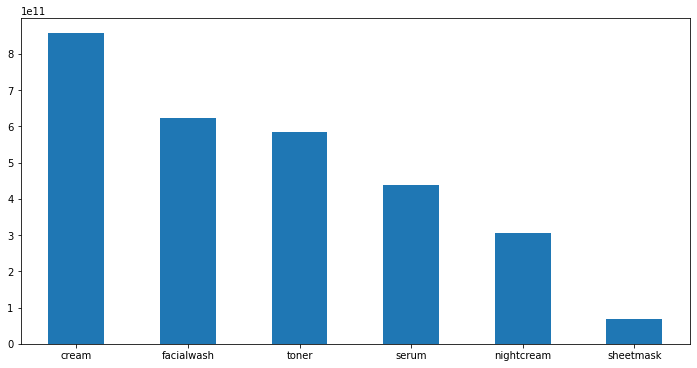

In [83]:
# Product dengan profit tertinggi

df[['serum','cream','toner','facialwash','sheetmask','nightcream']].sum().sort_values(ascending=False).plot(
    kind='bar', figsize=(12,6))

plt.xticks(rotation=0)
plt.show()

In [84]:
data = df[['serum','cream','toner','facialwash','sheetmask','nightcream']].sum().reset_index().rename(columns={'index':'products'})
px.pie(data, values=0, names='products', title='Proporsi product pada keseluruhan profit')

Cream adalah product dengan kontribusi profit tertinggi dengan persentase 29%

In [85]:
px.histogram(df, x='subtotal')

Terdapat 4 agen dengan nilai subtotal yang sangat besar dan jauh dari agen lainnya, kita akan coba analisa 4 agen ini

In [86]:
# Identifying top customers
                                           
fig = px.bar(df.sort_values('subtotal',ascending=False)[:4], x="agen", y=['serum','cream','toner','facialwash','sheetmask','nightcream'],
             title="perbandingan penjualan produk untuk 4 agen teratas",text_auto=True)
fig.show()                                           

In [87]:
# Jumlah agen masing-masing provinsi

df.groupby('provinsi')['agen'].nunique().sort_values(ascending=False)

provinsi
jawa barat                   110
jawa timur                   100
jawa tengah                   68
banten                        39
dki jakarta                   34
sumatera utara                30
kalimantan timur              30
sulawesi selatan              24
sumatera barat                23
riau                          20
lampung                       18
jambi                         15
sumatera selatan              14
sulawesi tenggara             14
aceh                          14
kepulauan riau                12
kalimantan tengah             11
sulawesi tengah               10
di yogyakarta                  9
kepulauan bangka belitung      9
kalimantan barat               8
nusa tenggara barat            8
kalimantan selatan             8
bali                           7
maluku utara                   6
bengkulu                       5
gorontalo                      4
papua barat                    4
papua                          4
maluku                         4
s

In [88]:
# Menghitung profit dari masing-masing provinsi

data = df.groupby('provinsi')['subtotal'].sum().reset_index().sort_values(by='subtotal',ascending=False).reset_index(drop=True)

others = data[5:]['subtotal'].sum()

new_data_prop = data[:5]

new_data_prop.loc[len(new_data_prop)] = ["other",others]

In [89]:
# Grafik persentase profit dari setiap provinsi

import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=new_data_prop['provinsi'], 
                             values=new_data_prop['subtotal'], hole=.4, sort=False)])

fig.show()

Coba fokus ke 3 provinsi dengan profit terbesar: Jawa Barat, Jawa Tengah, Jawa Timur

In [90]:
# Periksa korelasi antar pendapatan masing-masing produk

df.corr(numeric_only=True)

,subtotal,serum,cream,toner,facialwash,sheetmask,nightcream
subtotal,1.000000,0.991252,0.996841,0.993851,0.997726,0.888553,0.889067
serum,0.991252,1.000000,0.987088,0.984794,0.988033,0.865575,0.866129
cream,0.996841,0.987088,1.000000,0.992788,0.995415,0.865967,0.866765
toner,0.993851,0.984794,0.992788,1.000000,0.998160,0.864331,0.840528
facialwash,0.997726,0.988033,0.995415,0.998160,1.000000,0.880444,0.862669
sheetmask,0.888553,0.865575,0.865967,0.864331,0.880444,1.000000,0.877465
nightcream,0.889067,0.866129,0.866765,0.840528,0.862669,0.877465,1.000000


All corelations coefisien is high, no special number, it expected

In [91]:
# ambil data hanya dari jawa

df_jawa = df[(df['provinsi'] == 'jawa timur') | (df['provinsi'] == 'jawa tengah') | (df['provinsi'] == 'jawa barat')].copy()
df_jawa

,agen,kota,provinsi,subtotal,serum,cream,toner,facialwash,sheetmask,nightcream
1,abdul latif murabbi,kabupaten pacitan,jawa timur,6118494000,984960000,1692900000,923400000,1250010000,424536000,842688000
2,abdullah faiq,kabupaten cilacap,jawa tengah,4573972800,384912000,1341360000,1341360000,1266840000,0,239500800
8,adhy nugraha,kabupaten bogor,jawa barat,1328162400,87480000,393660000,349920000,330480000,166622400,0
9,adhy nugraha/wildan fauzan nashir,kabupaten bogor,jawa barat,874584000,87480000,262440000,262440000,247860000,14364000,0
10,agus nursalim,kabupaten bogor,jawa barat,390015000,87480000,174960000,65610000,61965000,0,0
...,...,...,...,...,...,...,...,...,...,...
656,yazid asrofi,kabupaten bogor,jawa barat,15614532000,2318220000,4732668000,3612924000,3536136000,430920000,983664000
658,yeti meilana sari,kabupaten pacitan,jawa timur,180576000,0,0,0,0,0,180576000
667,yunita dwi aris ambarsari,kabupaten cilacap,jawa tengah,5166936000,874800000,1341360000,933120000,1046520000,229824000,741312000
668,yunita indriyani,kabupaten bogor,jawa barat,1921941000,393660000,485514000,218700000,367659000,28728000,427680000


In [92]:
df_jawa

,agen,kota,provinsi,subtotal,serum,cream,toner,facialwash,sheetmask,nightcream
1,abdul latif murabbi,kabupaten pacitan,jawa timur,6118494000,984960000,1692900000,923400000,1250010000,424536000,842688000
2,abdullah faiq,kabupaten cilacap,jawa tengah,4573972800,384912000,1341360000,1341360000,1266840000,0,239500800
8,adhy nugraha,kabupaten bogor,jawa barat,1328162400,87480000,393660000,349920000,330480000,166622400,0
9,adhy nugraha/wildan fauzan nashir,kabupaten bogor,jawa barat,874584000,87480000,262440000,262440000,247860000,14364000,0
10,agus nursalim,kabupaten bogor,jawa barat,390015000,87480000,174960000,65610000,61965000,0,0
...,...,...,...,...,...,...,...,...,...,...
656,yazid asrofi,kabupaten bogor,jawa barat,15614532000,2318220000,4732668000,3612924000,3536136000,430920000,983664000
658,yeti meilana sari,kabupaten pacitan,jawa timur,180576000,0,0,0,0,0,180576000
667,yunita dwi aris ambarsari,kabupaten cilacap,jawa tengah,5166936000,874800000,1341360000,933120000,1046520000,229824000,741312000
668,yunita indriyani,kabupaten bogor,jawa barat,1921941000,393660000,485514000,218700000,367659000,28728000,427680000


In [93]:
df_jawa['kota'].value_counts()

kota
kabupaten bogor      110
kabupaten pacitan    100
kabupaten cilacap     68
Name: count, dtype: int64

In [94]:
df_jawa.groupby('kota')['subtotal'].sum()

kota
kabupaten bogor      696421256760
kabupaten cilacap    634121228160
kabupaten pacitan    859829724000
Name: subtotal, dtype: int64

In [95]:
# Performa agen untuk setiap provinsi

df_jawa[df_jawa['provinsi'] == 'jawa timur'].sort_values(by=['provinsi','subtotal'], ascending=False)

,agen,kota,provinsi,subtotal,serum,cream,toner,facialwash,sheetmask,nightcream
345,masyithoh syahda fitri shofiyah,kabupaten pacitan,jawa timur,180342832000,27825120000,59220720000,46046880000,44186400000,1859872000,1203840000
371,muhammad amarudin,kabupaten pacitan,jawa timur,58634808640,10723752000,16624893600,12866040000,13030336800,1253392000,4136394240
375,muhammad shifri jalla,kabupaten pacitan,jawa timur,58578307200,7571880000,18221760000,12619800000,12093120000,0,8071747200
124,dhanang bagus setyawan,kabupaten pacitan,jawa timur,45701384000,8495280000,12681360000,9972720000,9651240000,687344000,4213440000
647,wildan ma&#039;arif,kabupaten pacitan,jawa timur,43126580000,6771600000,11286000000,10260000000,9786900000,808640000,4213440000
...,...,...,...,...,...,...,...,...,...,...
304,lailathul maghfiroh,kabupaten pacitan,jawa timur,402952000,0,123120000,123120000,116280000,40432000,0
277,jannatul khoiriyah,kabupaten pacitan,jawa timur,362520000,0,184680000,61560000,116280000,0,0
420,nur lilis suaidah,kabupaten pacitan,jawa timur,361836000,0,135432000,98496000,127908000,0,0
658,yeti meilana sari,kabupaten pacitan,jawa timur,180576000,0,0,0,0,0,180576000


In [96]:
df_jawa[df_jawa['provinsi'] == 'jawa tengah'].sort_values(by=['provinsi','subtotal'], ascending=False)

,agen,kota,provinsi,subtotal,serum,cream,toner,facialwash,sheetmask,nightcream
129,dila safterina mardani,kabupaten cilacap,jawa tengah,298659780000,39171600000,86780160000,65342700000,67766760000,8235360000,31363200000
214,hanin hanania,kabupaten cilacap,jawa tengah,56498976000,8981280000,15979680000,10818360000,11599848000,1991808000,7128000000
390,ngaqiqotul maula al farikah,kabupaten cilacap,jawa tengah,36095016960,5676868800,10439280000,8817984000,8801784000,229824000,2129276160
85,bagus wijayanto,kabupaten cilacap,jawa tengah,21072715200,4580452800,5202144000,2974320000,5177520000,766080000,2372198400
445,pradika destarini,kabupaten cilacap,jawa tengah,20504124000,2752704000,7190856000,4461480000,4643244000,229824000,1226016000
...,...,...,...,...,...,...,...,...,...,...
504,rizqi amalia,kabupaten cilacap,jawa tengah,228096000,0,0,0,0,0,228096000
320,linda wulandari,kabupaten cilacap,jawa tengah,191520000,0,0,0,0,191520000,0
233,hidayatul faizah,kabupaten cilacap,jawa tengah,174960000,174960000,0,0,0,0,0
557,siti nga&#039;isah hidhayati rodhiyah,kabupaten cilacap,jawa tengah,171072000,0,0,0,0,0,171072000


In [97]:
df_jawa[df_jawa['provinsi'] == 'jawa barat'].sort_values(by=['provinsi','subtotal'], ascending=False)

,agen,kota,provinsi,subtotal,serum,cream,toner,facialwash,sheetmask,nightcream
96,cepi ahmad sujai,kabupaten bogor,jawa barat,128841681240,18082116000,42941307600,23256558000,26021169000,2469171600,16071359040
523,salman alfarishi,kabupaten bogor,jawa barat,101696342400,13347698400,31405320000,19892952000,20869812000,1896048000,14284512000
238,ichwan,kabupaten bogor,jawa barat,63980506800,10500224400,17600976000,12877056000,13467060000,861840000,8673350400
25,alifanandito,kabupaten bogor,jawa barat,55362204000,5642460000,21607560000,14040540000,13301820000,0,769824000
607,tedy kurniawan,kabupaten bogor,jawa barat,33541776000,6211080000,11197440000,5686200000,6940080000,0,3506976000
...,...,...,...,...,...,...,...,...,...,...
603,syaiful arifin,kabupaten bogor,jawa barat,128304000,0,0,0,0,0,128304000
655,yayang rizkiana,kabupaten bogor,jawa barat,128304000,0,0,0,0,0,128304000
136,doddy (test dev),kabupaten bogor,jawa barat,87480000,87480000,0,0,0,0,0
159,endang ahmat (jastip),kabupaten bogor,jawa barat,85536000,0,0,0,0,0,85536000


In [98]:
# Menghitung perbandingan penjualan produk untuk 3 provinsi teratas

df_penjualan_product_jawa = df_jawa.groupby('provinsi')[['subtotal','serum','cream','toner','facialwash','sheetmask','nightcream']].sum().reset_index()
df_penjualan_product_jawa

,provinsi,subtotal,serum,cream,toner,facialwash,sheetmask,nightcream
0,jawa barat,696421256760,102620455200,215391312000,136646028000,147017424600,13743064800,81002972160
1,jawa tengah,634121228160,91682928000,183992601600,128495095200,140085698400,20025331200,69839573760
2,jawa timur,859829724000,134568928800,258476486400,183876436800,190255785600,15656887680,76995198720


In [99]:
px.bar

<function plotly.express._chart_types.bar(data_frame=None, x=None, y=None, color=None, pattern_shape=None, facet_row=None, facet_col=None, facet_col_wrap=0, facet_row_spacing=None, facet_col_spacing=None, hover_name=None, hover_data=None, custom_data=None, text=None, base=None, error_x=None, error_x_minus=None, error_y=None, error_y_minus=None, animation_frame=None, animation_group=None, category_orders=None, labels=None, color_discrete_sequence=None, color_discrete_map=None, color_continuous_scale=None, pattern_shape_sequence=None, pattern_shape_map=None, range_color=None, color_continuous_midpoint=None, opacity=None, orientation=None, barmode='relative', log_x=False, log_y=False, range_x=None, range_y=None, text_auto=False, title=None, template=None, width=None, height=None)>

In [100]:
# Grafik perbandingan penjualan produk untuk 3 provinsi teratas

fig = px.bar(df_penjualan_product_jawa.sort_values(by='subtotal',ascending=False), x="provinsi", y=['serum','cream','toner','facialwash','sheetmask','nightcream'],
             title="perbandingan penjualan produk untuk 3 provinsi teratas",text_auto=True,)
fig.show()

- Jawa Timur adalah provinsi dengan penjualan tertinggi
- Product dengan penjualan tertinggi di jawa dan masing-masing provinsi adalah `Cream`
- Product dengan penjualan terendah di jawa dan masing-masing provinsi adalah `Sheetmask`

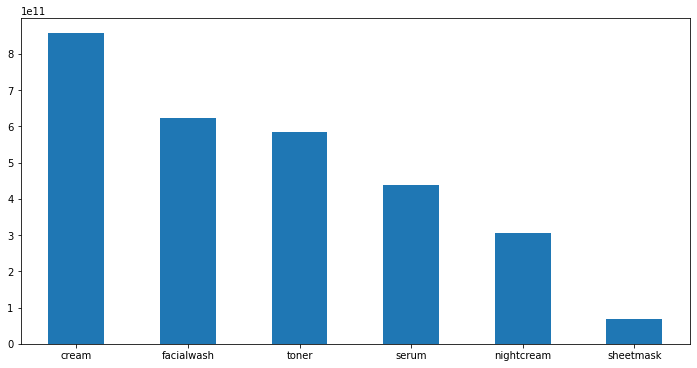

In [101]:
# Product dengan profit tertinggi


df[['serum','cream','toner','facialwash','sheetmask','nightcream']].sum().sort_values(ascending=False).plot(
    kind='bar', figsize=(12,6))

plt.xticks(rotation=0)
plt.show()

In [102]:
# analisis jumlah 0 pada masing-masing product

cols = ['serum','cream','toner','facialwash','sheetmask','nightcream']
zero_products = [ df[df[col]==0][col].count() for col in cols]
zero_products

[87, 41, 53, 43, 188, 161]

In [103]:
# Visualisasi product kosong

product_kosong = pd.DataFrame({'product':cols,'jumlah_kosong':zero_products})
product_kosong.sort_values(by='jumlah_kosong',ascending=False,inplace=True)

px.bar(product_kosong,x='product',y='jumlah_kosong', title='Jumlah kekosongan product dari setiap agen')

- **Terdapat cream dan facial wash yang kosong padahal dua product tersebut adalah product yang paling banyak dibeli customer**
- **Memastikan cream dan facialwash tersebar ke semua agen karena 2 product tersebut terbukti banyak diminati customers**
- Sheetmask dan Nightcream kurang diminati sehingga banyak product yang kosong/tidak dibeli

coba periksa proporsi provinsi dimana cream tidak tersebar

In [104]:
data = df.groupby('provinsi')['subtotal'].sum().reset_index().sort_values(by='subtotal',ascending=False).reset_index(drop=True)

others = data[5:]['subtotal'].sum()

new_data_prop = data[:5]

new_data_prop.loc[len(new_data_prop)] = ["other",others]

In [105]:
# Proporsi provinsi dimana cream tidak tersebar

data = df[df['cream']==0].provinsi.value_counts().reset_index()
others = data[5:]['count'].sum()

new_data_prop = data[:5]

new_data_prop.loc[len(new_data_prop)] = ["other",others]


fig = go.Figure(data=[go.Pie(labels=new_data_prop['provinsi'], 
                             values=new_data_prop['count'], hole=.4, sort=False)])

fig.show()

In [106]:
df_jawa.cream.mean()

2366404316.5467625

In [107]:
# Menghitung estimasi profit jika cream tersebar diseluruh jawa 
# dengan asumsi rata profit crean darisetiap agen adalah 2366404316.5467625

additional_cream_profit = df_jawa.cream.mean() * df_jawa[df_jawa['cream']==0]['cream'].count()
additional_cream_profit

35496064748.20144

In [108]:
df_jawa.subtotal.sum()

2190372208920

In [109]:
persentase_kenaikan_profit = (additional_cream_profit * 100)/df.subtotal.sum()
persentase_kenaikan_profit

1.2339063845164142

- 31.7% dari keseluruhan cream tidak tersebar di provinsi jawa barat dan jawa tengah sedangkan kedua provinsi tersebut termasuk dari 3 provinsi dengan penjualan terbanyak

- cream adalah product unggulan kita
- kita tahu bahwa provinsi jawa barat dan jawa tengah menyumbang 46% profit yang didapatkan

**Rekomendasi**
- maka memastikan bahwa cream tersebar pada semua agen di jawa barat dan jawa timur akan meningkatkan profit dan penjualan dengan estimasi sekitar `...%` 

In [110]:
# data kosong pada setiap provinsi (tidak di merge)

data_kosong_serum = df[df['serum']==0].provinsi.value_counts().reset_index().rename(columns={'count':'serum'})
data_kosong_cream = df[df['cream']==0].provinsi.value_counts().reset_index().rename(columns={'count':'cream'})
data_kosong_toner = df[df['toner']==0].provinsi.value_counts().reset_index().rename(columns={'count':'toner'})
data_kosong_facialwash = df[df['facialwash']==0].provinsi.value_counts().reset_index().rename(columns={'count':'facialwash'})
data_kosong_sheetmask = df[df['sheetmask']==0].provinsi.value_counts().reset_index().rename(columns={'count':'sheetmask'})
data_kosong_nightcream = df[df['nightcream']==0].provinsi.value_counts().reset_index().rename(columns={'count':'nightcream'})

In [111]:
# Total product tidak tersebar pada setiap kota

# data_kosong['total_kosong'] = data_kosong.iloc[:,1:].sum(axis=1)
# data_kosong.head()

In [112]:
# Menghitung total subtotal masing-masing provinsi

# data_kosong = data_kosong.merge(df.groupby('provinsi')['subtotal'].sum().reset_index())
# data_kosong.head()

In [113]:
# Menambahkan total profit masing-masing provinsi

# data_kosong = data_kosong.merge(df.groupby('provinsi')[cols].sum().reset_index(), on='provinsi', suffixes=('_kosong','_profit'))
# data_kosong.head()

- **di provinsi mana saja cream harus dipastikan tersebar semua?**

In [114]:
# Define custom function untuk menghitung data jumlah kosong

def sum_zero(series):
    return series.apply(lambda x: 1 if x == 0 else 0).sum()

In [115]:
# menghitung data kosong product pada setiap provinsi

df_kosong = df.groupby('provinsi').agg({
    'serum': sum_zero,
    'cream': sum_zero,
    'toner': sum_zero,
    'facialwash': sum_zero,
    'sheetmask': sum_zero,
    'nightcream': sum_zero,
    'subtotal':'sum',
    'agen' : 'nunique',
    
}).reset_index()

df_kosong.head()

,provinsi,serum,cream,toner,facialwash,sheetmask,nightcream,subtotal,agen
0,aceh,4,2,2,2,4,4,18127070040,14
1,bali,3,2,2,2,5,3,8778108600,7
2,banten,5,2,3,2,12,11,172677498240,39
3,bengkulu,1,0,0,0,3,2,2549102000,5
4,di yogyakarta,2,1,1,1,1,0,11488927400,9


In [116]:
# Total product tidak tersebar pada setiap kota

df_kosong['total_kosong'] = df_kosong.iloc[:,1:7].sum(axis=1)
df_kosong.head()

,provinsi,serum,cream,toner,facialwash,sheetmask,nightcream,subtotal,agen,total_kosong
0,aceh,4,2,2,2,4,4,18127070040,14,18
1,bali,3,2,2,2,5,3,8778108600,7,17
2,banten,5,2,3,2,12,11,172677498240,39,35
3,bengkulu,1,0,0,0,3,2,2549102000,5,6
4,di yogyakarta,2,1,1,1,1,0,11488927400,9,6


In [117]:
# Menambahkan total profit masing-masing provinsi

df_kosong = df_kosong.merge(df.groupby('provinsi')[cols].sum().reset_index(), on='provinsi', suffixes=('_kosong','_profit'))
df_kosong.head()

,provinsi,serum_kosong,cream_kosong,toner_kosong,facialwash_kosong,sheetmask_kosong,nightcream_kosong,subtotal,agen,total_kosong,serum_profit,cream_profit,toner_profit,facialwash_profit,sheetmask_profit,nightcream_profit
0,aceh,4,2,2,2,4,4,18127070040,14,18,2923419600,5192553600,3050103600,3473253000,740767440,2746972800
1,bali,3,2,2,2,5,3,8778108600,7,17,1385100000,2813940000,2106810000,2044845000,90972000,336441600
2,banten,5,2,3,2,12,11,172677498240,39,35,30214080000,49504305600,36565084800,36726120000,3532650240,16135257600
3,bengkulu,1,0,0,0,3,2,2549102000,5,6,328860000,813240000,392040000,589050000,45752000,380160000
4,di yogyakarta,2,1,1,1,1,0,11488927400,9,6,1906578000,2954070000,2423520000,2438055000,226898000,1539806400


In [118]:
df_kosong.head()

,provinsi,serum_kosong,cream_kosong,toner_kosong,facialwash_kosong,sheetmask_kosong,nightcream_kosong,subtotal,agen,total_kosong,serum_profit,cream_profit,toner_profit,facialwash_profit,sheetmask_profit,nightcream_profit
0,aceh,4,2,2,2,4,4,18127070040,14,18,2923419600,5192553600,3050103600,3473253000,740767440,2746972800
1,bali,3,2,2,2,5,3,8778108600,7,17,1385100000,2813940000,2106810000,2044845000,90972000,336441600
2,banten,5,2,3,2,12,11,172677498240,39,35,30214080000,49504305600,36565084800,36726120000,3532650240,16135257600
3,bengkulu,1,0,0,0,3,2,2549102000,5,6,328860000,813240000,392040000,589050000,45752000,380160000
4,di yogyakarta,2,1,1,1,1,0,11488927400,9,6,1906578000,2954070000,2423520000,2438055000,226898000,1539806400


## Potensi product untuk setiap kota

### Cream

In [119]:
# copy data_kosong ke variabel baru data provinsi

data_prov = df_kosong.copy()
data_prov

,provinsi,serum_kosong,cream_kosong,toner_kosong,facialwash_kosong,sheetmask_kosong,nightcream_kosong,subtotal,agen,total_kosong,serum_profit,cream_profit,toner_profit,facialwash_profit,sheetmask_profit,nightcream_profit
0,aceh,4,2,2,2,4,4,18127070040,14,18,2923419600,5192553600,3050103600,3473253000,740767440,2746972800
1,bali,3,2,2,2,5,3,8778108600,7,17,1385100000,2813940000,2106810000,2044845000,90972000,336441600
2,banten,5,2,3,2,12,11,172677498240,39,35,30214080000,49504305600,36565084800,36726120000,3532650240,16135257600
3,bengkulu,1,0,0,0,3,2,2549102000,5,6,328860000,813240000,392040000,589050000,45752000,380160000
4,di yogyakarta,2,1,1,1,1,0,11488927400,9,6,1906578000,2954070000,2423520000,2438055000,226898000,1539806400
5,dki jakarta,6,3,4,4,13,8,62166997200,34,38,10328958000,18124689600,12463567200,13338540000,1321168800,6590073600
6,gorontalo,1,0,0,0,2,1,1305616800,4,4,211896000,395604000,203148000,222890400,77246400,194832000
7,jambi,3,1,1,1,8,3,9273112200,15,17,1332936000,2721114000,1708938000,1980891000,152737200,1376496000
8,jawa barat,13,8,12,9,33,28,696421256760,110,103,102620455200,215391312000,136646028000,147017424600,13743064800,81002972160
9,jawa tengah,7,5,5,5,14,13,634121228160,68,49,91682928000,183992601600,128495095200,140085698400,20025331200,69839573760


In [120]:
df[df['provinsi']=='malaysia']

,agen,kota,provinsi,subtotal,serum,cream,toner,facialwash,sheetmask,nightcream
127,dian rizkia,johor,malaysia,37192000,6480000,6480000,6480000,6120000,2128000,9504000


In [122]:
# sebaran jumlah agen pada masing-masing provinsi

px.histogram(data_prov, x='agen', nbins=50, color='provinsi', hover_name='provinsi', hover_data=['provinsi'])

In [123]:
data_prov[data_prov['provinsi']=='papua barat']

,provinsi,serum_kosong,cream_kosong,toner_kosong,facialwash_kosong,sheetmask_kosong,nightcream_kosong,subtotal,agen,total_kosong,serum_profit,cream_profit,toner_profit,facialwash_profit,sheetmask_profit,nightcream_profit
25,papua barat,0,0,0,0,0,1,3363323600,4,1,619164000,905580000,640224000,696150000,59477600,442728000


In [125]:
# menambahkan data latitude dan longitude untuk setiap kota agar dapat dibuat map visualization
# data map provinsi berisi longitude latitude

df_map = pd.read_json('provinces.json')
df_map['name'] = df_map['name'].str.lower()
df_map['alt_name'] = df_map['alt_name'].str.lower()
df_map

,id,name,alt_name,latitude,longitude
0,11,aceh,aceh,4.36855,97.02530
1,12,sumatera utara,sumatera utara,2.19235,99.38122
2,13,sumatera barat,sumatera barat,-1.34225,100.07610
3,14,riau,riau,0.50041,101.54758
4,15,jambi,jambi,-1.61157,102.77970
5,16,sumatera selatan,sumatera selatan,-3.12668,104.09306
6,17,bengkulu,bengkulu,-3.51868,102.53598
7,18,lampung,lampung,-4.85550,105.02730
8,19,kepulauan bangka belitung,kepulauan bangka belitung,-2.75775,107.58394
9,21,kepulauan riau,kepulauan riau,-0.15478,104.58037


In [126]:
df_full_map = data_prov.merge(df_map, left_on='provinsi', right_on='name', how='left')
df_full_map.isna().sum()

provinsi             0
serum_kosong         0
cream_kosong         0
toner_kosong         0
facialwash_kosong    0
sheetmask_kosong     0
nightcream_kosong    0
subtotal             0
agen                 0
total_kosong         0
serum_profit         0
cream_profit         0
toner_profit         0
facialwash_profit    0
sheetmask_profit     0
nightcream_profit    0
id                   1
name                 1
alt_name             1
latitude             1
longitude            1
dtype: int64

In [127]:
# Mengisi data Malaysia

df_full_map['id'] = df_full_map['id'].fillna(100)
df_full_map['name'] = df_full_map['name'].fillna('Malaysia')
df_full_map['alt_name'] = df_full_map['alt_name'].fillna('Malaysia')
df_full_map['latitude'] = df_full_map['latitude'].fillna(3.140853)
df_full_map['longitude'] = df_full_map['longitude'].fillna(101.693207)
df_full_map.isna().sum()

provinsi             0
serum_kosong         0
cream_kosong         0
toner_kosong         0
facialwash_kosong    0
sheetmask_kosong     0
nightcream_kosong    0
subtotal             0
agen                 0
total_kosong         0
serum_profit         0
cream_profit         0
toner_profit         0
facialwash_profit    0
sheetmask_profit     0
nightcream_profit    0
id                   0
name                 0
alt_name             0
latitude             0
longitude            0
dtype: int64

In [128]:
df_full_map.drop(columns=['id','name'],inplace=True)
df_full_map

,provinsi,serum_kosong,cream_kosong,toner_kosong,facialwash_kosong,sheetmask_kosong,nightcream_kosong,subtotal,agen,total_kosong,serum_profit,cream_profit,toner_profit,facialwash_profit,sheetmask_profit,nightcream_profit,alt_name,latitude,longitude
0,aceh,4,2,2,2,4,4,18127070040,14,18,2923419600,5192553600,3050103600,3473253000,740767440,2746972800,aceh,4.368550,97.025300
1,bali,3,2,2,2,5,3,8778108600,7,17,1385100000,2813940000,2106810000,2044845000,90972000,336441600,bali,-8.235660,115.122390
2,banten,5,2,3,2,12,11,172677498240,39,35,30214080000,49504305600,36565084800,36726120000,3532650240,16135257600,banten,-6.445380,106.137560
3,bengkulu,1,0,0,0,3,2,2549102000,5,6,328860000,813240000,392040000,589050000,45752000,380160000,bengkulu,-3.518680,102.535980
4,di yogyakarta,2,1,1,1,1,0,11488927400,9,6,1906578000,2954070000,2423520000,2438055000,226898000,1539806400,di yogyakarta,-7.795600,110.369500
5,dki jakarta,6,3,4,4,13,8,62166997200,34,38,10328958000,18124689600,12463567200,13338540000,1321168800,6590073600,dki jakarta,-6.174500,106.822700
6,gorontalo,1,0,0,0,2,1,1305616800,4,4,211896000,395604000,203148000,222890400,77246400,194832000,gorontalo,0.718620,122.455590
7,jambi,3,1,1,1,8,3,9273112200,15,17,1332936000,2721114000,1708938000,1980891000,152737200,1376496000,jambi,-1.611570,102.779700
8,jawa barat,13,8,12,9,33,28,696421256760,110,103,102620455200,215391312000,136646028000,147017424600,13743064800,81002972160,jawa barat,-6.889170,107.640470
9,jawa tengah,7,5,5,5,14,13,634121228160,68,49,91682928000,183992601600,128495095200,140085698400,20025331200,69839573760,jawa tengah,-7.303240,110.004410


In [129]:
# Sebaran product kosong

fig = px.density_mapbox(df_full_map, lat = 'latitude', lon = 'longitude', z = 'total_kosong',
                        radius = 25,
                        center = dict(lat = -6.1745, lon = 106.8227),
                        zoom = 6,
                        mapbox_style = 'open-street-map', hover_data=['provinsi'])
fig.show()

In [130]:
# Sebaran agen setiap provinsi

fig = px.density_mapbox(df_full_map, lat = 'latitude', lon = 'longitude', z = 'agen',
                        radius = 25,
                        center = dict(lat = 42.83, lon = -8.35),
                        zoom = 6,
                        mapbox_style = 'open-street-map', hover_data=['provinsi','subtotal'],
                        title='Sebaran jumlah agen pada setiap provinsi')
fig.show()

- Daerah Kalimantan timur terlihat memiliki minat yang kurang terhadap product kita, karena di kalimantan timur termasuk daerah yang memiliki cukup banyak agen namun tidak memiliki profit yang banyak, dibandingkan dengan daerah sumatera utara yang memiliki jumlah agen yang sama, mampu menghasilkan profit yang cukup lebih banyak dari kalimantan timur.

In [132]:
# Perbandingan Profit Sumatera utara dan Kalimantan timur (jumlah agen sama = 30)

px.bar(df_full_map[(df_full_map['provinsi'] == 'kalimantan timur') 
                   | (df_full_map['provinsi'] == 'sumatera utara')][['provinsi','subtotal']],
      x='provinsi',y='subtotal', title='Perbandingan Profit Provinsi Sumatera Utara dan Kalimantan Timur'
      )

In [133]:
px.scatter(df_full_map, x='agen',y='subtotal', title='Korelasi jumlah agen dengan Profit', hover_data=['provinsi'])

In [134]:
# Sebaran profit Serum 

fig = px.density_mapbox(df_full_map, lat = 'latitude', lon = 'longitude', z = 'serum_profit',
                        radius = 25,
                        center = dict(lat = 42.83, lon = -8.35),
                        zoom = 6,
                        mapbox_style = 'open-street-map', hover_data=['provinsi'])
fig.show()

- Sumatera Barat terlihat memiliki potensi yang bagus untuk product Serum

In [135]:
# Sebaran profit cream 

fig = px.density_mapbox(df_full_map, lat = 'latitude', lon = 'longitude', z = 'cream_profit',
                        radius = 25,
                        center = dict(lat = 42.83, lon = -8.35),
                        zoom = 6,
                        mapbox_style = 'open-street-map', hover_data=['provinsi'])
fig.show()

In [136]:
# Sebaran profit toner 

fig = px.density_mapbox(df_full_map, lat = 'latitude', lon = 'longitude', z = 'toner_profit',
                        radius = 25,
                        center = dict(lat = -6.1745, lon = 106.8227),
                        zoom = 6,
                        mapbox_style = 'open-street-map', hover_data=['provinsi'],
                        title='Sebaran Profit toner pada setiap provinsi')
fig.show()

In [137]:
# Sebaran profit facialwash 

fig = px.density_mapbox(df_full_map, lat = 'latitude', lon = 'longitude', z = 'facialwash_profit',
                        radius = 25,
                        center = dict(lat = -6.1745, lon = 106.8227),
                        zoom = 6,
                        mapbox_style = 'open-street-map', hover_data=['provinsi'],
                       title='Sebaran Profit facialwash pada setiap provinsi')
fig.show()

## Potensi product Sheetmask

In [138]:
# Sebaran profit sheetmask 

fig = px.density_mapbox(df_full_map, lat = 'latitude', lon = 'longitude', z = 'sheetmask_profit',
                        radius = 25,
                        center = dict(lat = -6.1745, lon = 106.8227),
                        zoom = 6,
                        mapbox_style = 'open-street-map', hover_data=['provinsi'], title='Sebaran Profit sheetmask pada setiap provinsi')
fig.show()

In [139]:
df_full_map[(df_full_map['provinsi'] == 'sulawesi selatan') 
                   | (df_full_map['provinsi'] == 'sumatera barat')
           | (df_full_map['provinsi'] == 'kalimantan timur')]

,provinsi,serum_kosong,cream_kosong,toner_kosong,facialwash_kosong,sheetmask_kosong,nightcream_kosong,subtotal,agen,total_kosong,serum_profit,cream_profit,toner_profit,facialwash_profit,sheetmask_profit,nightcream_profit,alt_name,latitude,longitude
14,kalimantan timur,3,2,2,2,5,5,25895516000,30,19,3414960000,7189560000,4855140000,5272380000,1075172000,4088304000,kalimantan timur,0.78844,116.24200
28,sulawesi selatan,3,0,0,0,4,4,44199212160,24,11,7247232000,12942374400,7724678400,8335440000,1831952640,6117534720,sulawesi selatan,-3.64467,119.94719
32,sumatera barat,2,0,0,0,6,7,54693962400,23,15,7618050000,16091784000,9350964000,11959398000,1722403200,7951363200,sumatera barat,-1.34225,100.07610


- Kota dengan potensi peminat product sheetmask adalah sulawesi selatan, sumatera barat dan kalimantan timur, memastikan sheetmask tersebar ke semua agen di 3 kota ini diprediksi dapat menambah profit, karena cukup banyak sheetmask yang tidak tersebar di 3 provinsi tersebut
- memberikan promo dengan menargetkan customers di daerah sulawesi selatan dan sumatera barat juga diprediksi sesuai sasaran karena dari data sheetmask cukup diminati di 2 kota tersebut

In [140]:
# Agen sulawesi selatan dengan jumlah penjualan sheetmask tertinggi

df[df['provinsi'] == 'sulawesi selatan'].sort_values(by='sheetmask', ascending=False)

,agen,kota,provinsi,subtotal,serum,cream,toner,facialwash,sheetmask,nightcream
187,fhirawati,kabupaten kepulauan selayar,sulawesi selatan,7232112000,1127520000,2060640000,1337472000,1373328000,344736000,988416000
521,sahir,kabupaten kepulauan selayar,sulawesi selatan,4719600000,777600000,1306368000,1010880000,976752000,229824000,418176000
590,sunarti ( ibu afif ),kabupaten kepulauan selayar,sulawesi selatan,1261296000,116640000,388800000,155520000,257040000,153216000,190080000
120,dewi angreini,kabupaten kepulauan selayar,sulawesi selatan,2046521280,279936000,559872000,295488000,370872000,137383680,402969600
298,kiki riskyanti,kabupaten kepulauan selayar,sulawesi selatan,3339794880,734832000,1066089600,320371200,466344000,127935360,624222720
224,hasnawati,kabupaten kepulauan selayar,sulawesi selatan,1980758400,404352000,466560000,256608000,330480000,89376000,433382400
642,wahyuni,kabupaten kepulauan selayar,sulawesi selatan,869803200,54432000,265161600,131414400,216648000,88099200,114048000
531,satriani ( ummu azkadina ),kabupaten kepulauan selayar,sulawesi selatan,2053761600,334368000,544320000,244944000,341496000,86822400,501811200
446,pratiwi,kabupaten kepulauan selayar,sulawesi selatan,979411200,186624000,295488000,209952000,205632000,81715200,0
251,ima amir,kabupaten kepulauan selayar,sulawesi selatan,727416000,77760000,194400000,136080000,128520000,76608000,114048000


URUTKAN PROFIT TIAP PRODUK DI TIAP PROVINSI KAYA DIBAWAH

In [141]:
product_terlaris_provinsi = []
for idx in range(35):
    products = list(df_full_map.iloc[idx,10:16].sort_values(ascending=False).index)
    product_terlaris_provinsi.append(products)
product_terlaris_provinsi

[['cream_profit',
  'facialwash_profit',
  'toner_profit',
  'serum_profit',
  'nightcream_profit',
  'sheetmask_profit'],
 ['cream_profit',
  'toner_profit',
  'facialwash_profit',
  'serum_profit',
  'nightcream_profit',
  'sheetmask_profit'],
 ['cream_profit',
  'facialwash_profit',
  'toner_profit',
  'serum_profit',
  'nightcream_profit',
  'sheetmask_profit'],
 ['cream_profit',
  'facialwash_profit',
  'toner_profit',
  'nightcream_profit',
  'serum_profit',
  'sheetmask_profit'],
 ['cream_profit',
  'facialwash_profit',
  'toner_profit',
  'serum_profit',
  'nightcream_profit',
  'sheetmask_profit'],
 ['cream_profit',
  'facialwash_profit',
  'toner_profit',
  'serum_profit',
  'nightcream_profit',
  'sheetmask_profit'],
 ['cream_profit',
  'facialwash_profit',
  'serum_profit',
  'toner_profit',
  'nightcream_profit',
  'sheetmask_profit'],
 ['cream_profit',
  'facialwash_profit',
  'toner_profit',
  'nightcream_profit',
  'serum_profit',
  'sheetmask_profit'],
 ['cream_profit'

In [142]:
df_potensi_product = pd.DataFrame(product_terlaris_provinsi)
df_potensi_product

,0,1,2,3,4,5
0,cream_profit,facialwash_profit,toner_profit,serum_profit,nightcream_profit,sheetmask_profit
1,cream_profit,toner_profit,facialwash_profit,serum_profit,nightcream_profit,sheetmask_profit
2,cream_profit,facialwash_profit,toner_profit,serum_profit,nightcream_profit,sheetmask_profit
3,cream_profit,facialwash_profit,toner_profit,nightcream_profit,serum_profit,sheetmask_profit
4,cream_profit,facialwash_profit,toner_profit,serum_profit,nightcream_profit,sheetmask_profit
5,cream_profit,facialwash_profit,toner_profit,serum_profit,nightcream_profit,sheetmask_profit
6,cream_profit,facialwash_profit,serum_profit,toner_profit,nightcream_profit,sheetmask_profit
7,cream_profit,facialwash_profit,toner_profit,nightcream_profit,serum_profit,sheetmask_profit
8,cream_profit,facialwash_profit,toner_profit,serum_profit,nightcream_profit,sheetmask_profit
9,cream_profit,facialwash_profit,toner_profit,serum_profit,nightcream_profit,sheetmask_profit


In [143]:
df_potensi_product['provinsi'] = df_full_map.provinsi.values

In [144]:
df_potensi_product = df_potensi_product[['provinsi', 0,1,2,3,4,5]]
df_potensi_product.rename(columns={
    0:'Produk terlaris ke-1',
    1:'Produk terlaris ke-2',
    2:'Produk terlaris ke-3',
    3:'Produk terlaris ke-4',
    4:'Produk terlaris ke-5',
    5:'Produk jarang dibeli'
},inplace=True)

In [145]:
# Produk terlaris ke-1

px.bar(df_potensi_product['Produk terlaris ke-1'].value_counts(),
      title='Produk paling laris dari setiap provinsi')

In [146]:
# Produk terlaris ke-2

px.bar(df_potensi_product['Produk terlaris ke-2'].value_counts(),
      title='Produk paling laris ke-2 dari setiap provinsi')

In [147]:
# Produk terlaris ke-3

px.bar(df_potensi_product['Produk terlaris ke-3'].value_counts(),
      title='Produk paling laris ke-3 dari setiap provinsi')

In [148]:
cols2 = ['serum_profit','cream_profit','toner_profit','facialwash_profit','sheetmask_profit','nightcream_profit']
cols2

['serum_profit',
 'cream_profit',
 'toner_profit',
 'facialwash_profit',
 'sheetmask_profit',
 'nightcream_profit']

In [149]:
df_full_map[df_full_map['provinsi'] == 'bali'][cols2].T.sort_values(by=1,ascending=False).reset_index().rename(columns={
    'index':'products',
    1:'profit'
})

,products,profit
0,cream_profit,2813940000
1,toner_profit,2106810000
2,facialwash_profit,2044845000
3,serum_profit,1385100000
4,nightcream_profit,336441600
5,sheetmask_profit,90972000


## Peminat Toner

In [150]:
px.bar(df_full_map[df_full_map['provinsi'] == 'bali'][cols2].T.sort_values(by=1,ascending=False).reset_index().rename(columns={
    'index':'products',
    1:'profit'}),
    x='products',y='profit',
      title='Profit product dari Bali')

In [151]:
px.bar(df_full_map[df_full_map['provinsi'] == 'sulawesi barat'][cols2].T.sort_values(by=27,ascending=False).reset_index().rename(columns={
    'index':'products',
    27:'profit'}),
    x='products',y='profit',
      title='Profit product dari sulawesi barat')

## Peminat NightCream

In [152]:
px.bar(df_full_map[df_full_map['provinsi'] == 'kepulauan bangka belitung'][cols2].T.sort_values(by=16,ascending=False).reset_index().rename(columns={
    'index':'products',
    16:'profit'}),
    x='products',y='profit',
      title='Profit product dari bangka belitung')

In [153]:
df_full_map[df_full_map['provinsi'] == 'nusa tenggara timur'][cols2].T

,23
serum_profit,106920000
cream_profit,0
toner_profit,0
facialwash_profit,0
sheetmask_profit,35112000
nightcream_profit,104544000


In [154]:
px.bar(df_full_map[df_full_map['provinsi'] == 'nusa tenggara timur'][cols2].T.sort_values(by=23,ascending=False).reset_index().rename(columns={
    'index':'products',
    23:'profit'}),
    x='products',y='profit',
      title='Profit product dari nusa tenggara timur')

## Peminat Serum

In [155]:
df_full_map[df_full_map['provinsi'] == 'nusa tenggara timur'][cols2].T

,23
serum_profit,106920000
cream_profit,0
toner_profit,0
facialwash_profit,0
sheetmask_profit,35112000
nightcream_profit,104544000


In [156]:
px.bar(df_full_map[df_full_map['provinsi'] == 'nusa tenggara timur'][cols2].T.sort_values(by=23,ascending=False).reset_index().rename(columns={
    'index':'products',
    23:'profit'}),
    x='products',y='profit',
      title='Profit product dari nusa tenggara timur')

In [157]:
list(df_full_map.iloc[1,10:16].sort_values(ascending=False).index)

['cream_profit',
 'toner_profit',
 'facialwash_profit',
 'serum_profit',
 'nightcream_profit',
 'sheetmask_profit']

In [158]:
df_full_map.iloc[13,10:16].sort_values(ascending=False).index

Index(['cream_profit', 'facialwash_profit', 'serum_profit',
       'nightcream_profit', 'toner_profit', 'sheetmask_profit'],
      dtype='object')

In [159]:
df_full_map.loc[13]

provinsi             kalimantan tengah
serum_kosong                         1
cream_kosong                         1
toner_kosong                         1
facialwash_kosong                    1
sheetmask_kosong                     4
nightcream_kosong                    1
subtotal                   11107673920
agen                                11
total_kosong                         9
serum_profit                1925078400
cream_profit                2809144800
toner_profit                1755432000
facialwash_profit           2487290400
sheetmask_profit             283024000
nightcream_profit           1847704320
alt_name             kalimantan tengah
latitude                      -1.49958
longitude                    113.29033
Name: 13, dtype: object

In [160]:
data_prov

,provinsi,serum_kosong,cream_kosong,toner_kosong,facialwash_kosong,sheetmask_kosong,nightcream_kosong,subtotal,agen,total_kosong,serum_profit,cream_profit,toner_profit,facialwash_profit,sheetmask_profit,nightcream_profit
0,aceh,4,2,2,2,4,4,18127070040,14,18,2923419600,5192553600,3050103600,3473253000,740767440,2746972800
1,bali,3,2,2,2,5,3,8778108600,7,17,1385100000,2813940000,2106810000,2044845000,90972000,336441600
2,banten,5,2,3,2,12,11,172677498240,39,35,30214080000,49504305600,36565084800,36726120000,3532650240,16135257600
3,bengkulu,1,0,0,0,3,2,2549102000,5,6,328860000,813240000,392040000,589050000,45752000,380160000
4,di yogyakarta,2,1,1,1,1,0,11488927400,9,6,1906578000,2954070000,2423520000,2438055000,226898000,1539806400
5,dki jakarta,6,3,4,4,13,8,62166997200,34,38,10328958000,18124689600,12463567200,13338540000,1321168800,6590073600
6,gorontalo,1,0,0,0,2,1,1305616800,4,4,211896000,395604000,203148000,222890400,77246400,194832000
7,jambi,3,1,1,1,8,3,9273112200,15,17,1332936000,2721114000,1708938000,1980891000,152737200,1376496000
8,jawa barat,13,8,12,9,33,28,696421256760,110,103,102620455200,215391312000,136646028000,147017424600,13743064800,81002972160
9,jawa tengah,7,5,5,5,14,13,634121228160,68,49,91682928000,183992601600,128495095200,140085698400,20025331200,69839573760


In [161]:
# Proporsi profit serum berdasarkan provinsi

px.pie(data_prov, values='serum_profit', names='provinsi')

- Kota dengan kontribusi terbanyak pada profit kita adalah Jawa Timur, Jawa Barat, Jawa Tengah, Banten, Sumatera Utara
- Pada profit semua product, 5 provinsi diatas selalu menjadi provinsi teratas. kemungkinan ini terjadi karena memang product sudah cukup dikenal di kota2 ini sehingga penjualan lebih baik. maka akan lebih menguntungkan jika tetap semua product tersebar diseluruh agen pada kota tersebut

In [163]:
data_prov['serum_rate'] = data_prov['serum_profit'] / data_prov['agen']
data_prov['cream_rate'] = data_prov['cream_profit'] / data_prov['agen']
data_prov['toner_rate'] = data_prov['toner_profit'] / data_prov['agen']
data_prov['facialwash_rate'] = data_prov['facialwash_profit'] / data_prov['agen']
data_prov['sheetmask_rate'] = data_prov['sheetmask_profit'] / data_prov['agen']

In [164]:
df.groupby('provinsi')[cols].sum()

,serum,cream,toner,facialwash,sheetmask,nightcream
provinsi,,,,,,
aceh,2923419600,5192553600,3050103600,3473253000,740767440,2746972800
bali,1385100000,2813940000,2106810000,2044845000,90972000,336441600
banten,30214080000,49504305600,36565084800,36726120000,3532650240,16135257600
bengkulu,328860000,813240000,392040000,589050000,45752000,380160000
di yogyakarta,1906578000,2954070000,2423520000,2438055000,226898000,1539806400
dki jakarta,10328958000,18124689600,12463567200,13338540000,1321168800,6590073600
gorontalo,211896000,395604000,203148000,222890400,77246400,194832000
jambi,1332936000,2721114000,1708938000,1980891000,152737200,1376496000
jawa barat,102620455200,215391312000,136646028000,147017424600,13743064800,81002972160


# Clustering

In [165]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [166]:
df_cluster = df.groupby('provinsi').sum().reset_index().drop(columns=['agen','kota','subtotal'])

In [167]:
cols

['serum', 'cream', 'toner', 'facialwash', 'sheetmask', 'nightcream']

- Nusa Tenggara Timur bisa dicoba diberikan produk unggulan yaitu cream

In [168]:
scaler = MinMaxScaler()
scaler.fit(df_cluster[cols])
df_cluster[cols] = scaler.transform(df_cluster[cols])

In [169]:
model = KMeans(n_clusters=3)
model

KMeans(n_clusters=3)

In [170]:
inertia = []
for k in range(1, 9):
    model = KMeans(n_clusters=k)
    model.fit(df_cluster[cols])
    inertia.append(model.inertia_)
inertia

[11.748688094836861,
 0.6706256605945636,
 0.3257518934427362,
 0.14489003492840552,
 0.07385468353786782,
 0.01891342796986549,
 0.009868540699402639,
 0.006804692045058677]

In [171]:
inertia_df = pd.DataFrame({'Inertia':inertia}, index=[i for i in range(1, 9)])
inertia_df

,Inertia
1,11.748688
2,0.670626
3,0.325752
4,0.144890
5,0.073855
6,0.018913
7,0.009869
8,0.006805


Text(0.5, 1.0, 'Elbow Method')

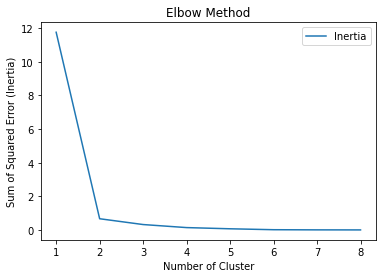

In [172]:
inertia_df.plot(kind='line')
plt.ylabel('Sum of Squared Error (Inertia)')
plt.xlabel('Number of Cluster')
plt.title('Elbow Method')

In [173]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df_cluster[cols])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [174]:
df_cluster['cluster']= y_predicted
df_cluster

,provinsi,serum,cream,toner,facialwash,sheetmask,nightcream,cluster
0,aceh,0.021677,0.020089,0.016588,0.018256,0.036992,0.033799,0
1,bali,0.010245,0.010887,0.011458,0.010748,0.004543,0.004037,0
2,banten,0.224488,0.191523,0.198857,0.193035,0.176409,0.199099,0
3,bengkulu,0.002396,0.003146,0.002132,0.003096,0.002285,0.004576,0
4,di yogyakarta,0.014121,0.011429,0.013180,0.012815,0.011331,0.018894,0
5,dki jakarta,0.076711,0.070121,0.067782,0.070108,0.065975,0.081248,0
6,gorontalo,0.001527,0.001531,0.001105,0.001172,0.003857,0.002288,0
7,jambi,0.009858,0.010528,0.009294,0.010412,0.007627,0.016878,0
8,jawa barat,0.762575,0.833311,0.743141,0.772736,0.686284,1.000000,1
9,jawa tengah,0.681293,0.711835,0.698812,0.736302,1.000000,0.862169,1


Hasil Clustering expected, hasil cluster hanya menjadi `2 cluster`, yaitu cluster wilayah dengan profit tertinggi `(Jawa Timur, Jawa Barat dan Jawa Tengah)` dan cluster wilayah dengan profit rendah `(Wilayah kota lain)`